In [1]:
import pickle
import numpy as np 

In [2]:
with open("train_qa220120145526-220818-175522.txt","rb") as fp :
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
train_data[0]#it will dive the only the story part 

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [5]:
' '.join(train_data[0][0])#it will give the  story part join will give the context in single string 

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [6]:
train_data[0][2]# no join single word 

'no'

In [7]:
' '.join(train_data[0][1])#question in a single tuple 

'Is Sandra in the hallway ?'

In [8]:
vocab= set()#creating a single set 

In [9]:
with open("test_qa220120145430-220818-175426.txt","rb") as fp :
    test_data= pickle.load(fp)

In [10]:
all_data = train_data+ test_data

In [11]:
for story , question ,answer in all_data:
    vocab = vocab.union(set(story))
    vocab= vocab.union(set(question))#get the union of the  data for the unique words 

In [12]:
vocab.add('yes')
vocab.add('no')

In [13]:
len(vocab)#unique words 
vocab_len = len(vocab)+1

In [14]:
len(vocab)

37

In [15]:
for data in all_data:
    print(data[0])#only the story part 
    print(len(data[0]))#only the question  part length 
    print("\n")
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
#we can get the max of all  story length  through 
max_story_length = max([len(data[0]) for data in all_data])
max_story_length

156

In [17]:
max_ques_length = max([len(data[1]) for data in all_data])
max_ques_length

6

In [18]:
#now we vectorize the dataset that is assign the string a numeric value   
from keras.utils import pad_sequences
from keras.preprocessing.text  import Tokenizer 

In [19]:
tokenizer = Tokenizer(filters=[])

In [20]:
tokenizer.fit_on_texts(vocab)

In [21]:
tokenizer.word_index#it will assign the string a numeric value 

{'went': 1,
 'back': 2,
 'milk': 3,
 'left': 4,
 'in': 5,
 'the': 6,
 'put': 7,
 'hallway': 8,
 'no': 9,
 'bedroom': 10,
 'up': 11,
 'down': 12,
 'kitchen': 13,
 'moved': 14,
 'mary': 15,
 'daniel': 16,
 'john': 17,
 'apple': 18,
 '.': 19,
 'journeyed': 20,
 'picked': 21,
 'is': 22,
 'discarded': 23,
 'took': 24,
 'yes': 25,
 'bathroom': 26,
 'grabbed': 27,
 'there': 28,
 'office': 29,
 'dropped': 30,
 'football': 31,
 'travelled': 32,
 'sandra': 33,
 '?': 34,
 'to': 35,
 'garden': 36,
 'got': 37}

In [22]:
train_story_text= []
train_question_text= []
train_answer=[]

for story,question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [23]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text) #transforms each text in texts to a sequence of integers 

In [24]:
len(train_story_text)


10000

In [25]:
len(train_story_seq)

10000

In [26]:
train_story_seq

[[15, 14, 35, 6, 26, 19, 33, 20, 35, 6, 10, 19],
 [15,
  14,
  35,
  6,
  26,
  19,
  33,
  20,
  35,
  6,
  10,
  19,
  15,
  1,
  2,
  35,
  6,
  10,
  19,
  16,
  1,
  2,
  35,
  6,
  8,
  19],
 [15,
  14,
  35,
  6,
  26,
  19,
  33,
  20,
  35,
  6,
  10,
  19,
  15,
  1,
  2,
  35,
  6,
  10,
  19,
  16,
  1,
  2,
  35,
  6,
  8,
  19,
  33,
  1,
  35,
  6,
  13,
  19,
  16,
  1,
  2,
  35,
  6,
  26,
  19],
 [15,
  14,
  35,
  6,
  26,
  19,
  33,
  20,
  35,
  6,
  10,
  19,
  15,
  1,
  2,
  35,
  6,
  10,
  19,
  16,
  1,
  2,
  35,
  6,
  8,
  19,
  33,
  1,
  35,
  6,
  13,
  19,
  16,
  1,
  2,
  35,
  6,
  26,
  19,
  16,
  21,
  11,
  6,
  31,
  28,
  19,
  16,
  1,
  35,
  6,
  10,
  19],
 [15,
  14,
  35,
  6,
  26,
  19,
  33,
  20,
  35,
  6,
  10,
  19,
  15,
  1,
  2,
  35,
  6,
  10,
  19,
  16,
  1,
  2,
  35,
  6,
  8,
  19,
  33,
  1,
  35,
  6,
  13,
  19,
  16,
  1,
  2,
  35,
  6,
  26,
  19,
  16,
  21,
  11,
  6,
  31,
  28,
  19,
  16,
  1,
  35,
  6,
  1

In [27]:
#now just functionalize the vectors 
def vectorize_stories(data,word_index = tokenizer.word_index,max_story_length = max_story_length,max_ques_length=max_ques_length):
#data contains the story ,queries ,answer 
#word_index =token.word_index will take the dictionary from the tokenizer (con)
#this for pad sequencing function 

    X=[]#stories
    Xq= []#questions 
    Y= [] #correct answer

    for story,question,answer in data:
        x= [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question ]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]]=1


        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return(pad_sequences(X , maxlen = max_story_length) ,
            pad_sequences(Xq , maxlen = max_ques_length) ,#maxlen is a keyword
                 np.array(Y) )
    


In [28]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [29]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [30]:
inputs_train

array([[ 0,  0,  0, ...,  6, 10, 19],
       [ 0,  0,  0, ...,  6,  8, 19],
       [ 0,  0,  0, ...,  6, 26, 19],
       ...,
       [ 0,  0,  0, ...,  6, 10, 19],
       [ 0,  0,  0, ...,  3, 28, 19],
       [ 0,  0,  0, ..., 18, 28, 19]])

In [31]:
questions_train

array([[22, 33,  5,  6,  8, 34],
       [22, 16,  5,  6, 26, 34],
       [22, 16,  5,  6, 29, 34],
       ...,
       [22, 33,  5,  6,  8, 34],
       [22, 15,  5,  6, 13, 34],
       [22, 15,  5,  6, 10, 34]])

In [32]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
tokenizer.word_index['yes']

25

In [34]:
tokenizer.word_index['no']

9

In [137]:
from keras.models import Sequential ,Model
from keras.layers import Embedding#some time error may occur of module not found so try with layer lib only  
from keras.layers import Input, Activation , Dense , Permute ,Dropout ,add ,dot ,concatenate ,LSTM  

In [138]:
input_sequence = Input((max_story_length,))#it will be stored as tuple 
question = Input((max_ques_length,))

In [139]:
#input the encoder  m 
input_encoder_m= Sequential()
input_encoder_m.add(Embedding(input_dim =vocab_len , output_dim=64))
input_encoder_m.add(Dropout(0.3))  

In [140]:
#input_encoder_c 
input_encoder_c= Sequential()
input_encoder_c.add(Embedding(input_dim =vocab_len , output_dim = max_ques_length ))
input_encoder_c.add(Dropout(0.3))  

In [141]:
#Question encoder 
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim =64 ,input_length =max_ques_length))
question_encoder.add(Dropout(0.3))

In [142]:
#encode the sequence 
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)




In [143]:
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match )


In [144]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [145]:
answer = concatenate([response ,question_encoded])


In [146]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_2')>

In [147]:
#lstm = long short term memory 
#special type of rnn which has higher capability of storing the previous data
answer = LSTM(32)(answer)

In [148]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [149]:
answer = Activation('softmax')(answer)

In [155]:
#now create the model 
model = Model([input_sequence ,question],answer )
model.compile(optimizer = 'rmsprop' ,loss ='categorical_crossentropy',metrics = ['accuracy'])

In [156]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_5 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_7 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [158]:
#now we will train the model 
history = model.fit([inputs_train, questions_train], answers_train,
                    batch_size=32, epochs=20,
                    validation_data=([inputs_test, questions_test], answers_test)
                    )

Epoch 1/20
313/313 [==============================] - 17s 33ms/step - loss: 0.9207 - accuracy: 0.4894 - val_loss: 0.6950 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 9s 28ms/step - loss: 0.7071 - accuracy: 0.4984 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6983 - accuracy: 0.4973 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6964 - accuracy: 0.4983 - val_loss: 0.6946 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6956 - accuracy: 0.5007 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6943 - accuracy: 0.5148 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 9s 28ms/step - loss: 0.6959 - accuracy: 0.5004 - val_loss: 0.6935 - val_accuracy: 0.497

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'epochs')

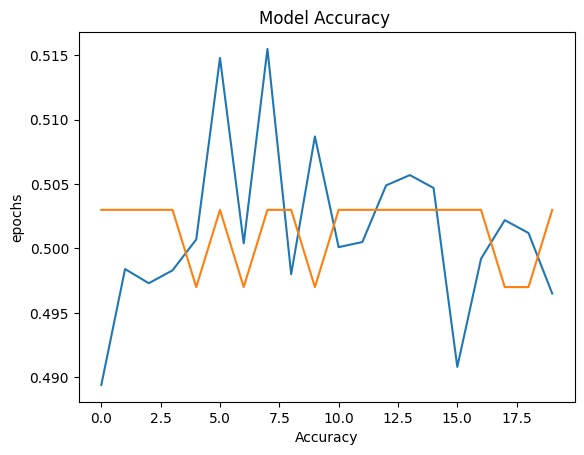

In [166]:
import matplotlib.pyplot as plt 
print(history.history.keys())
plt.plot(history.history['accuracy'])
#model accuracy 
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy ")
plt.xlabel("Accuracy")
plt.ylabel("epochs")



In [168]:
#save the model 
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [169]:
#evaluation on the test set 
model.load_weights("chatbot_model")

In [171]:
pred_results = model.predict(([inputs_test ,questions_test ]))

32/32 [==============================] - 2s 10ms/step


In [172]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [178]:
story = ' '.join(word for word in test_data[99][0] )


In [179]:
story 


'Daniel moved to the bedroom . Mary moved to the hallway . John journeyed to the garden . Mary went back to the bathroom . John journeyed to the hallway . John moved to the bedroom . Sandra moved to the kitchen . Daniel went to the kitchen . Sandra took the milk there . John journeyed to the bathroom .'

In [180]:
question = ' '.join(word for word in test_data[99][1] )

In [181]:
question

'Is Daniel in the garden ?'

In [183]:
test_data[13][2]

'yes'

In [187]:
# now we will generate predictions from the model 
val_max = np.argmax(pred_results[13]) #number you can enter as per your choice till 100 


for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key 
    
print("predicted result ", k )
print("probablity of certainity ",pred_results[13][val_max])

predicted result  no
probablity of certainity  0.51289225


In [188]:
#now we can our own story 
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [190]:
story ="Daniel moved office . John  picked apple in hallway "
story.split()

['Daniel', 'moved', 'office', '.', 'John', 'picked', 'apple', 'in', 'hallway']

In [216]:
my_question =" John  picked apple ? "

In [217]:
my_question.split()

['John', 'picked', 'apple', '?']

In [218]:
mydata=[(story.split(),question.split(),'yes')]

In [219]:
my_story , my_ques , my_ans = vectorize_stories(mydata) 

In [220]:
pred_results = model.predict([my_story,my_ques])
val_max = np.argmax(pred_results[0]) #number you can enter as per your choice till 100 


for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key 
    
print("predicted result ", k )
print("probablity of certainity ",pred_results[0][val_max])

1/1 [==============================] - 0s 68ms/step
predicted result  no
probablity of certainity  0.5129683


In [ ]:
#as it giving wrong we can try some other question to predict  